In [1]:
import torch
import pickle
import numpy as np
from dgl.data import AsNodePredDataset
from ogb.nodeproppred import DglNodePropPredDataset

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Training (Base Model)

In [2]:
!python3 node_classification_original.py --n_iter 5 --patience 20

2023-03-26 14:09:46.504270: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 14:09:47.202926: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 1.2752 | Val Accuracy : 0.8557 | Epoch Time : 3s | Patience   0/20
Iteration : 1 | Epoch :  1 | Loss : 0.5795 | Val Accuracy : 0.8770 | Epoch Time : 2s | Patience   0/20
Iteration : 1 | Epoch :  2 | Loss : 0.4885 | Val Accuracy : 0.8828 | Epoch Time : 2s | Patience   0/20
Iteration : 1 | Epoch :  3 | Loss : 0.4457 | Val Accuracy : 0.8904 | Epoch Time : 2s | Patience   0/20
Iterati

### Run with Pick

In [106]:
!python3 node_classification.py

2023-03-18 17:03:30.834432: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-18 17:03:30.873274: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 17:03:31.558207: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Training in mixed mode.
Loading data
Training...
Epoch 00000 | Loss 1.3972 | Accuracy 0.8491 | Time : 32s
Epoch 00001 | Loss 0.6263 | Accuracy 0.8713 | Time : 32s
Epoch 00002 | Loss 0.5185 | Accuracy 0.8797 | Time : 32s
Epoch 00003 | Loss 0.4630 | Ac

In [45]:
!python3 node_classification_PNC_Sample.py --n_iter 5 --patience 20

2023-03-30 19:14:24.289916: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 19:14:25.187721: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 1.3111 | Val Accuracy : 0.8537 | Epoch Time : 7s | Patience   0/20
Iteration : 1 | Epoch :  1 | Loss : 0.6213 | Val Accuracy : 0.8701 | Epoch Time : 3s | Patience   0/20
Iteration : 1 | Epoch :  2 | Loss : 0.5194 | Val Accuracy : 0.8789 | Epoch Time : 3s | Patience   0/20
Iteration : 1 | Epoch :  3 | Loss : 0.4791 | Val Accuracy : 0.8847 | Epoch Time : 4s | Patience   0/20
Iterati

### Load Graph and Labels

In [2]:
dataset = AsNodePredDataset(DglNodePropPredDataset('ogbn-products'))
g = dataset[0]
labels = g.ndata["label"]
train_mask = g.ndata["train_mask"]
val_mask = g.ndata["val_mask"]
test_mask = g.ndata["test_mask"]

### Load CNS Prediction Data

In [3]:
with open("../Correct_And_Smooth_OGB_Products/predicted_labels.pickle", "rb") as f:
    y_pred = pickle.load(f).flatten()

In [4]:
y_pred[train_mask.bool()] = labels[train_mask.bool()]
y_pred[val_mask.bool()] = labels[val_mask.bool()]

### Histogram Printing Function

In [5]:
def add_lost(h):
    add = [[i, 0] for i in range(47) if i not in h[:, 0].tolist()]
    if add: return np.vstack((h, np.array(add)))
    else: return h

def hist_plotter(labels, pred, train_mask=None, test_mask=None, val_mask=None):
    zoom = 24
    fig, axs = plt.subplots(5, 2, figsize=[16, 13], gridspec_kw={'width_ratios': [2, 1]})
    plt.tight_layout()
    
    data = labels.numpy()
    pred_data = pred.numpy()
    
    # Original Whole Data
    h = np.vstack(np.unique(data, return_counts=True)).T
    h = h[(h[:, 1] * -1).argsort()]
    h = add_lost(h)
    sns.barplot(x=list(range(h.shape[0])), y=h[:, 1], ax=axs[0][0])
    axs[0][0].set_xticks(ticks=range(h.shape[0]), labels=h[:, 0])
    axs[0][0].set_title("Original Whole Data")
    
    sns.barplot(x=list(range(zoom)), y=h[-zoom:, 1], ax=axs[0][1])
    axs[0][1].set_xticks(ticks=list(range(zoom)), labels=h[-zoom:, 0])
    
    # Original Train data
    train_data = data[train_mask.bool()]
    h = np.vstack(np.unique(train_data, return_counts=True)).T
    h = h[(h[:, 1] * -1).argsort()]
    h = add_lost(h)
    sns.barplot(x=list(range(h.shape[0])), y=h[:, 1], ax=axs[1][0])
    axs[1][0].set_xticks(ticks=list(range(h.shape[0])), labels=h[:, 0])
    axs[1][0].set_title("Original Train Data")
    
    sns.barplot(x=list(range(zoom)), y=h[-zoom:, 1], ax=axs[1][1])
    axs[1][1].set_xticks(ticks=list(range(zoom)), labels=h[-zoom:, 0])

    
    # Original Validation data
    val_data = data[val_mask.bool()]
    h = np.vstack(np.unique(val_data, return_counts=True)).T
    h = h[(h[:, 1] * -1).argsort()]
    h = add_lost(h)
    sns.barplot(x=list(range(h.shape[0])), y=h[:, 1], ax=axs[2][0])
    axs[2][0].set_xticks(ticks=range(h.shape[0]), labels=h[:, 0])
    axs[2][0].set_title("Original Validation Data")
    
    sns.barplot(x=list(range(zoom)), y=h[-zoom:, 1], ax=axs[2][1])
    axs[2][1].set_xticks(ticks=list(range(zoom)), labels=h[-zoom:, 0])
    
    
    # Original Test data
    test_data = data[test_mask.bool()]
    h = np.vstack(np.unique(test_data, return_counts=True)).T
    h = h[(h[:, 1] * -1).argsort()]
    h = add_lost(h)
    sns.barplot(x=list(range(h.shape[0])), y=h[:, 1], ax=axs[3][0])
    axs[3][0].set_xticks(ticks=sorted(h[:, 0].tolist()), labels=h[:, 0])
    axs[3][0].set_title("Original Test Data")
    
    sns.barplot(x=list(range(zoom)), y=h[-zoom:, 1], ax=axs[3][1])
    axs[3][1].set_xticks(ticks=list(range(zoom)), labels=h[-zoom:, 0])
    
    
    # Prediction Test data
    test_data = pred_data[test_mask.bool()]
    h = np.vstack(np.unique(test_data, return_counts=True)).T
    h = h[(h[:, 1] * -1).argsort()]
    h = add_lost(h)
    sns.barplot(x=list(range(h.shape[0])), y=h[:, 1], ax=axs[4][0])
    axs[4][0].set_xticks(ticks=sorted(h[:, 0].tolist()), labels=h[:, 0])
    axs[4][0].set_title("Predicted Test Data")
    
    sns.barplot(x=list(range(zoom)), y=h[-zoom:, 1], ax=axs[4][1])
    axs[4][1].set_xticks(ticks=list(range(zoom)), labels=h[-zoom:, 0])

### Histogram for Original Data

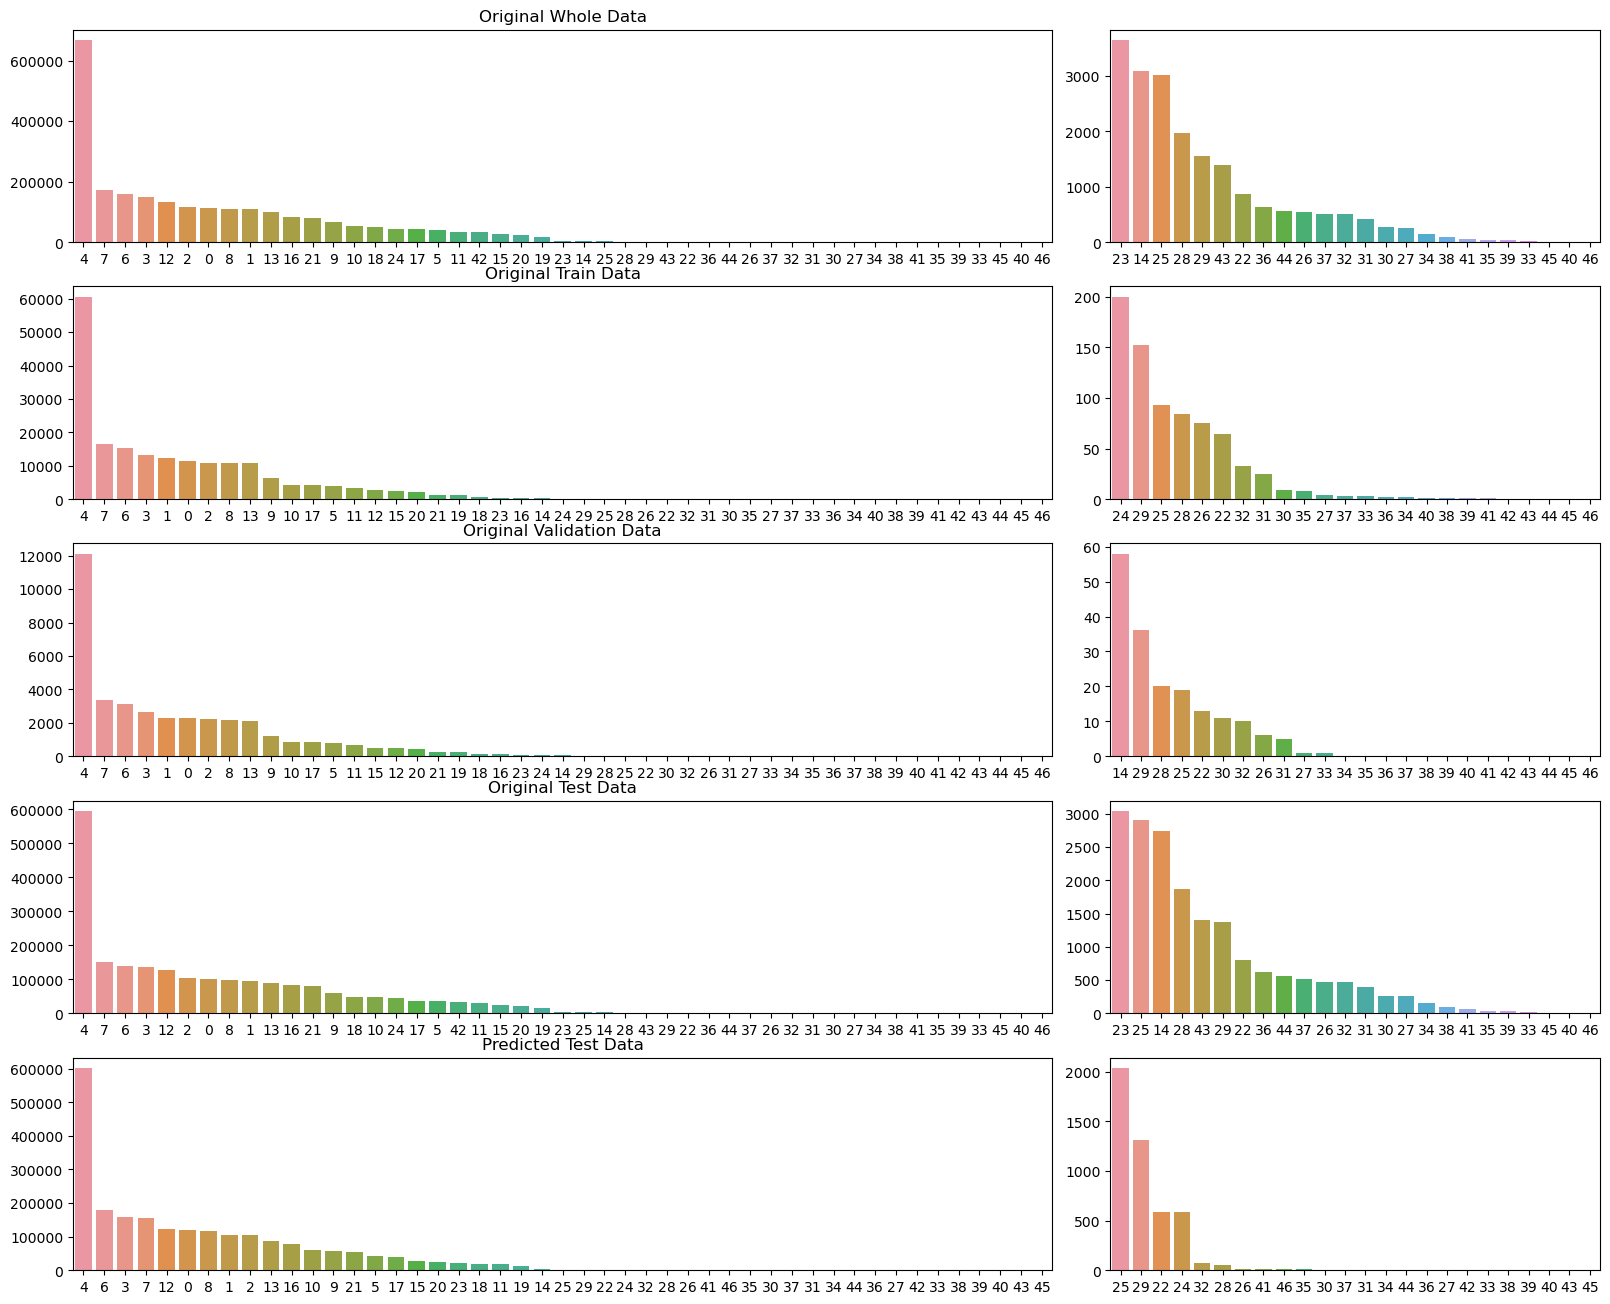

In [6]:
hist_plotter(labels, y_pred, train_mask, test_mask, val_mask)

### Find Class Probability of C & S

In [14]:
class_count = np.vstack(np.unique(y_pred, return_counts=True)).T

add = [[i, 0] for i in range(47) if i not in class_count[:, 0].tolist()]
if add: class_count = np.vstack((class_count, np.array(add)))

class_count = class_count[class_count[:, 0].argsort()]
class_count

array([[     0, 132300],
       [     1, 120283],
       [     2, 117143],
       [     3, 173658],
       [     4, 675477],
       [     5,  47293],
       [     6, 199108],
       [     7, 176248],
       [     8, 130887],
       [     9,  64397],
       [    10,  66027],
       [    11,  22392],
       [    12, 125100],
       [    13,  99658],
       [    14,   2796],
       [    15,  29944],
       [    16,  78700],
       [    17,  44110],
       [    18,  19893],
       [    19,  14213],
       [    20,  26406],
       [    21,  54865],
       [    22,    666],
       [    23,  22466],
       [    24,    846],
       [    25,   2151],
       [    26,     95],
       [    27,      6],
       [    28,    161],
       [    29,   1497],
       [    30,     27],
       [    31,     34],
       [    32,    117],
       [    33,      5],
       [    34,      4],
       [    35,     17],
       [    36,      3],
       [    37,      8],
       [    38,      1],
       [    39,      1],


In [20]:
s = np.sum(1/(np.log(10+class_count[:, 1]) ** 2))

class_proba = 1/(((np.log(10+class_count[:, 1]) ** 2)) )
class_proba

array([0.00719049, 0.00730803, 0.00734119, 0.00686993, 0.00554994,
       0.0086303 , 0.0067168 , 0.00685311, 0.0072036 , 0.00815589,
       0.00811919, 0.00996627, 0.00725921, 0.00754883, 0.01586398,
       0.0094124 , 0.00786829, 0.0087431 , 0.01020587, 0.0109357 ,
       0.00964622, 0.00839705, 0.02355115, 0.00995972, 0.02193312,
       0.0169616 , 0.04616944, 0.13008556, 0.0378262 , 0.01867368,
       0.0766946 , 0.06983196, 0.04261458, 0.13635987, 0.14358278,
       0.09205949, 0.15199959, 0.11969957, 0.17391602, 0.17391602,
       0.17391602, 0.10466225, 0.17391602, 0.1886117 , 0.17391602,
       0.1886117 , 0.10788514])

In [22]:
probs = 1 / np.log(10 + class_count[:, 1]) ** 2
probs

array([0.00719049, 0.00730803, 0.00734119, 0.00686993, 0.00554994,
       0.0086303 , 0.0067168 , 0.00685311, 0.0072036 , 0.00815589,
       0.00811919, 0.00996627, 0.00725921, 0.00754883, 0.01586398,
       0.0094124 , 0.00786829, 0.0087431 , 0.01020587, 0.0109357 ,
       0.00964622, 0.00839705, 0.02355115, 0.00995972, 0.02193312,
       0.0169616 , 0.04616944, 0.13008556, 0.0378262 , 0.01867368,
       0.0766946 , 0.06983196, 0.04261458, 0.13635987, 0.14358278,
       0.09205949, 0.15199959, 0.11969957, 0.17391602, 0.17391602,
       0.17391602, 0.10466225, 0.17391602, 0.1886117 , 0.17391602,
       0.1886117 , 0.10788514])

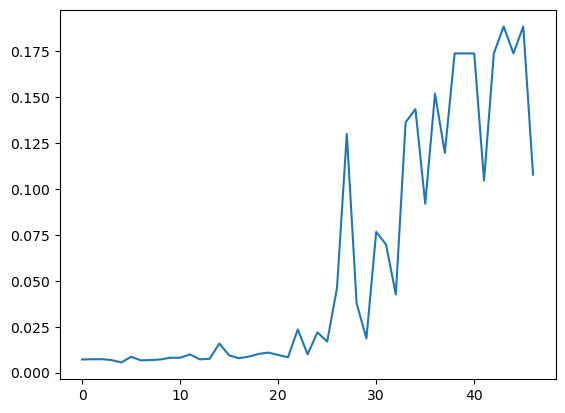

In [24]:
plt.plot(range(probs.shape[0]), probs)
plt.show()

### Run Choose Algorithm

In [9]:
!python3 node_classification_CNS_Sample.py --n_iter 5 --patience 20

2023-03-25 14:33:33.607526: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 14:33:34.385434: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 1.2366 | Val Accuracy : 0.8579 | Epoch Time : 8s | Patience   0/20
Iteration : 1 | Epoch :  1 | Loss : 0.5770 | Val Accuracy : 0.8770 | Epoch Time : 7s | Patience   0/20
Iteration : 1 | Epoch :  2 | Loss : 0.4899 | Val Accuracy : 0.8849 | Epoch Time : 8s | Patience   0/20
Iteration : 1 | Epoch :  3 | Loss : 0.4450 | Val Accuracy : 0.8889 | Epoch Time : 9s | Patience   0/20
Iterati

In [1]:
!python3 node_classification_CNS_Sample.py --n_iter 5 --patience 20

2023-03-26 13:40:27.861132: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 13:40:28.549586: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 1.2935 | Val Accuracy : 0.8578 | Epoch Time : 5s | Patience   0/20
Iteration : 1 | Epoch :  1 | Loss : 0.5846 | Val Accuracy : 0.8782 | Epoch Time : 4s | Patience   0/20
Iteration : 1 | Epoch :  2 | Loss : 0.4871 | Val Accuracy : 0.8865 | Epoch Time : 4s | Patience   0/20
Iteration : 1 | Epoch :  3 | Loss : 0.4413 | Val Accuracy : 0.8905 | Epoch Time : 4s | Patience   0/20
Iterati

### Pick Again

In [18]:
train_mask = g.ndata["train_mask"]
val_mask = g.ndata["val_mask"]
test_mask = g.ndata["test_mask"]

with open("../Correct_And_Smooth_OGB_Products/predicted_labels.pickle", "rb") as f:
    y_pred = pickle.load(f).flatten()

y_pred[train_mask.bool()] = labels[train_mask.bool()]
y_pred[val_mask.bool()] = labels[val_mask.bool()]

In [3]:
from pick_train_mask import LabelBalancedSampler

A = g.adj(scipy_fmt='coo')
lbs = LabelBalancedSampler(A, labels, train_mask.numpy())
probs = lbs.all_probabilities()
probs

tensor([1.3291e-05, 1.2412e-05, 1.6964e-05,  ..., 1.9501e-06, 1.2737e-05,
        2.3396e-06], dtype=torch.float64)

In [4]:
probs.shape

torch.Size([196615])

In [6]:
probs.sum()

tensor(5.6486, dtype=torch.float64)

### Run Both Pick and Choose

In [18]:
!python3 node_classification_CNS_Sample.py --n_iter 5 --patience 30

2023-04-02 19:50:28.379943: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 19:50:29.072079: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
Pick Probabilities Calculation Done...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 4.2235 | Val Accuracy : 0.5450 | Epoch Time : 1s | Patience   0/30
Iteration : 1 | Epoch :  1 | Loss : 2.5217 | Val Accuracy : 0.6528 | Epoch Time : 0s | Patience   0/30
Iteration : 1 | Epoch :  2 | Loss : 1.9746 | Val Accuracy : 0.7233 | Epoch Time : 0s | Patience   0/30
Iteration : 1 | Epoch :  3 | Loss : 1.6925 | Val Accuracy : 0.7585 | Ep

In [19]:
!python3 node_classification_CNS_Sample.py --n_iter 5 --patience 30

2023-04-02 20:05:13.540011: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 20:05:14.227243: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
Pick Probabilities Calculation Done...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 4.2667 | Val Accuracy : 0.5848 | Epoch Time : 1s | Patience   0/30
Iteration : 1 | Epoch :  1 | Loss : 2.5533 | Val Accuracy : 0.6586 | Epoch Time : 0s | Patience   0/30
Iteration : 1 | Epoch :  2 | Loss : 1.9878 | Val Accuracy : 0.7111 | Epoch Time : 0s | Patience   0/30
Iteration : 1 | Epoch :  3 | Loss : 1.7095 | Val Accuracy : 0.7473 | Ep

### Run only Pick (Correct Implementation)

In [2]:
!python3 node_classification_Pick_Correct.py  --n_iter 5 --patience 20

2023-04-03 19:31:34.819602: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 19:31:35.506781: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
Pick Probabilities Calculation Done...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 4.3522 | Val Accuracy : 0.5427 | Epoch Time : 1s | Patience   0/20
Iteration : 1 | Epoch :  1 | Loss : 2.5458 | Val Accuracy : 0.6521 | Epoch Time : 0s | Patience   0/20
Iteration : 1 | Epoch :  2 | Loss : 2.0548 | Val Accuracy : 0.7200 | Epoch Time : 0s | Patience   0/20
Iteration : 1 | Epoch :  3 | Loss : 1.7506 | Val Accuracy : 0.7367 | Ep

In [1]:
!python3 node_classification_Pick_Correct.py  --n_iter 5 --patience 20

2023-04-03 23:33:18.752755: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 23:33:19.438700: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
Pick Probabilities Calculation Done...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 4.3132 | Val Accuracy : 0.4907 | Epoch Time : 1s | Patience   0/20
Iteration : 1 | Epoch :  1 | Loss : 2.4973 | Val Accuracy : 0.6799 | Epoch Time : 0s | Patience   0/20
Iteration : 1 | Epoch :  2 | Loss : 2.0319 | Val Accuracy : 0.7335 | Epoch Time : 0s | Patience   0/20
Iteration : 1 | Epoch :  3 | Loss : 1.7183 | Val Accuracy : 0.7614 | Ep

In [2]:
!python3 node_classification_Pick_Correct.py  --n_iter 5 --patience 20

2023-04-03 23:42:28.799433: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 23:42:29.533033: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
Pick Probabilities Calculation Done...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 4.1711 | Val Accuracy : 0.5543 | Epoch Time : 1s | Patience   0/20
Iteration : 1 | Epoch :  1 | Loss : 2.4801 | Val Accuracy : 0.6818 | Epoch Time : 0s | Patience   0/20
Iteration : 1 | Epoch :  2 | Loss : 2.0074 | Val Accuracy : 0.7248 | Epoch Time : 0s | Patience   0/20
Iteration : 1 | Epoch :  3 | Loss : 1.7339 | Val Accuracy : 0.7535 | Ep

### KDE Plot of OGB Products

In [3]:
from collections import Counter

In [32]:
train_dist = Counter(labels[train_mask].tolist())
val_dist = Counter(labels[val_mask].tolist())
test_dist = Counter(labels[test_mask].tolist())

train_freq = np.array([train_dist[i] for i in range(47)])
val_freq = np.array([val_dist[i] for i in range(47)])
test_freq = np.array([test_dist[i] for i in range(47)])

In [7]:
train, test = labels[train_mask].tolist(), labels[test_mask].tolist()

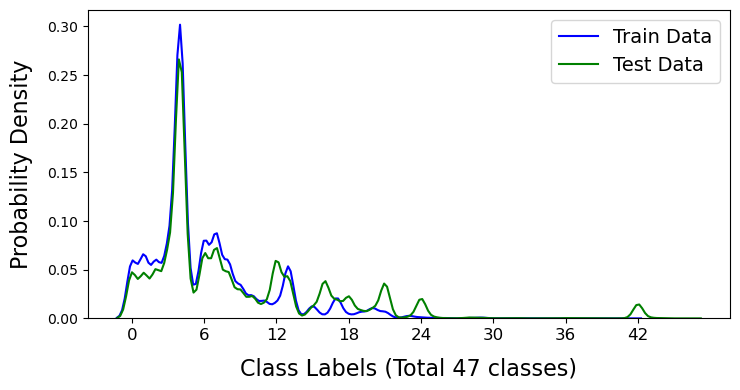

In [26]:
fig, ax = plt.subplots(figsize=[7.5, 4])

sns.kdeplot(train, fill=False, label="Train Data", c="b", alpha=1, lw=1.5)
# sns.kdeplot(labels[val_mask].tolist(), fill=True, label="validation Data", alpha=0.05, lw=2)
sns.kdeplot(test, fill=False, label="Test Data", color="green", alpha=1, lw=1.5)
plt.legend(fontsize=14)
# ax.yaxis.set_visible(False)
plt.xticks(range(0, 47, 6), fontsize=12)
plt.xlabel("Class Labels (Total 47 classes)", fontsize=16, labelpad=10)
plt.ylabel("Probability Density", fontsize=16, labelpad=10)
plt.tight_layout()
plt.savefig("ogb_prod_distribution.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [27]:
entropy = [4.310684704, 
           5.060226254, 
           5.141322129, 
           5.211360103, 
           4.638188391, 
           4.823458957, 
           4.462959757, 
           4.649869593, 
           3.829190961, 
           4.659564285, 
           4.496565868, 
           4.520808997, 
           5.182472349, 
           4.727982258, 
           5.318616902, 
           4.504298931]

entropy = np.array(entropy)

In [28]:
acc = [0.531760842,
       0.5036948571, 
       0.4822335025, 
       0.4659599881, 
       0.4788742908, 
       0.4326664676, 
       0.5323230815, 
       0.5091071962, 
       0.5188115855, 
       0.5265004479, 
       0.5047775455, 
       0.5484472977, 
       0.4496118244, 
       0.5266497462, 
       0.5231412362, 
       0.5813675724]

acc = np.array(acc)

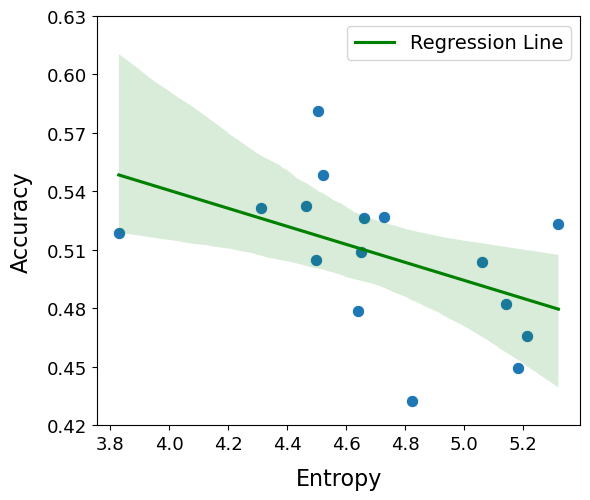

In [29]:
fig, ax = plt.subplots(figsize=[6, 5])
sns.scatterplot(x=entropy, y=acc, s=80)
sns.regplot(x=entropy, y=acc, color="green", scatter=False, label="Regression Line")

plt.xlabel("Entropy", fontsize=16, labelpad=10)
plt.ylabel("Accuracy", fontsize=16, labelpad=10)

plt.tight_layout()
plt.legend(fontsize=14)
plt.yticks([0.42 + i * 0.03 for i in range(8)], fontsize=13)
plt.xticks(fontsize=13)
# plt.title("Accuracy vs Entropy of OGB Papers Dataset", fontsize=16, pad=20)
plt.savefig("acc_vs_entropy.pdf", format="pdf", bbox_inches="tight")
plt.show()

[-10.   0.  10.  20.  30.  40.  50.]


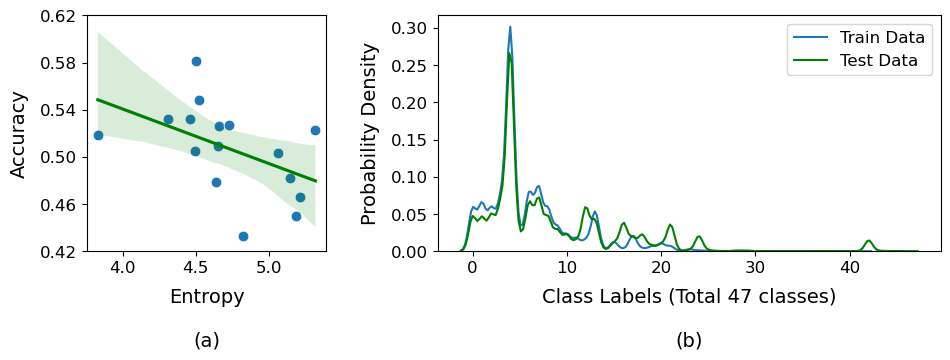

In [97]:
fig, ax = plt.subplots(1, 2, figsize=[10, 4.1], gridspec_kw={'width_ratios': [1, 2.1]})


sns.scatterplot(x=entropy, y=acc, s=60, ax=ax[0])
sns.regplot(x=entropy, y=acc, color="green", scatter=False, label="Regression Line", ax=ax[0])

ax[0].set_xlabel("Entropy\n\n(a)", fontsize=14, labelpad=8)
ax[0].set_ylabel("Accuracy", fontsize=14, labelpad=8)
ax[0].set_yticks([round(0.42 + i * 0.04, 2) for i in range(6)], fontsize=15)
ax[0].set_yticklabels(map(lambda x: f"{x:0.2f}", ax[0].get_yticks().tolist()), fontsize=12)
ax[0].set_xticklabels(ax[0].get_xticks(), fontsize=12)


sns.kdeplot(train, fill=False, label="Train Data", alpha=1, lw=1.5, ax=ax[1])
# sns.kdeplot(labels[val_mask].tolist(), fill=True, label="validation Data", alpha=0.05, lw=2)
sns.kdeplot(test, fill=False, label="Test Data", color="green", alpha=1, lw=1.5, ax=ax[1])
# ax.yaxis.set_visible(False)
# plt.xticks(range(0, 47, 6), fontsize=12)
ax[1].set_xlabel("Class Labels (Total 47 classes)\n\n(b)", fontsize=14, labelpad=8)
ax[1].set_ylabel("Probability Density", fontsize=14, labelpad=8)
ax[1].set_yticklabels(map(lambda x: f"{x:0.2f}", ax[1].get_yticks().tolist()), fontsize=12)
ax[1].set_xticklabels(map(lambda x: f"{int(x)}", ax[1].get_xticks().tolist()), fontsize=12)

print(ax[1].get_xticks())

# ax[0].set_fontsize(14)
plt.legend(fontsize=12)
plt.tight_layout(pad=2.5)
plt.savefig("entropy_distribution.pdf", format="pdf", bbox_inches="tight")
plt.show()